Utilizar los datos de Titanic para predecir la variable respuesta Survived a partir de

a) un arbol de decision.

b) un arbol de decision podado, eligiendo el parametro α mediante validacion cruzada.

c) bagging.

d) un bosque aleatorio.

e) boosting.

In [11]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [5]:
df = pd.read_csv("C:\\Users\\dario\\OneDrive\\Escritorio\\Unab\\Inferencia y Patrones\\Comisión 2 Florencia Statti\\Datos para Ejercicios\\datos_titanic.csv")

#Eliminamos las columnas a no utilizar
X = df.drop(["Survived", "Name", "Ticket", "Cabin"], axis = 1)

#Transformamos las variables tipo str a int
le = LabelEncoder()
X["Embarked"] = le.fit_transform(X["Embarked"])
X["Sex"] = le.fit_transform(X["Sex"])

#Reemplazamos datos faltantes

promedio = np.nanmean(X["Age"])


X["Age"] = np.where(np.isnan(X["Age"]), promedio, X["Age"])

y = df["Survived"]


In [7]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [8]:
arbol_base = DecisionTreeClassifier(max_depth = 1 ,random_state = 42)

#Boosting B = 100

modelo_boos = AdaBoostClassifier(
    estimator = arbol_base,
    n_estimators = 100,
    random_state = 42,
    learning_rate = 1.0
)

modelo_boos.fit(X_train,y_train)
prediccion = modelo_boos.predict(X_test)

In [12]:
accuracy_score(prediccion, y_test)

0.7741935483870968

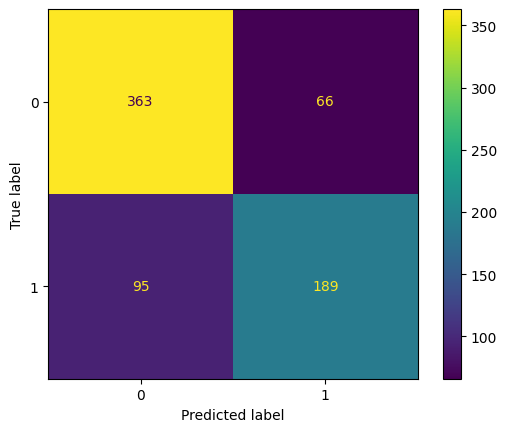

In [13]:
cm= confusion_matrix(y_test, prediccion)
ConfusionMatrixDisplay(cm).plot()